<a href="https://colab.research.google.com/github/Spoiler-xl/climate-model/blob/main/security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import joblib

# LOADING DATASET

In [ ]:
data = pd.read_csv('/content/qzvin_hourly_data.csv')

# DATA EXPLORATION

In [ ]:
#see the first five rows
data.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation,shortwave_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,global_tilted_irradiance_instant,terrestrial_radiation_instant
0,1999-12-31 20:30:00+00:00,4.9655,54.579082,-3.4345,1.918004,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1999-12-31 21:30:00+00:00,4.7655,54.118652,-3.7345002,1.697024,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1999-12-31 22:30:00+00:00,4.5655,53.861824,-3.9845002,1.451427,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1999-12-31 23:30:00+00:00,4.2655,54.388763,-4.1345,1.112651,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000-01-01 00:30:00+00:00,4.0155,54.320557,-4.3845,0.833469,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#describe the data
data.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation,shortwave_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,global_tilted_irradiance_instant,terrestrial_radiation_instant
count,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,...,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000,26181.000000
mean,11.908623,57.111697,1.458235,9.272500,0.043753,0.028452,0.011256,0.021388,6.828158,1015.263886,...,158.028800,60.994691,260.439910,219.023490,347.634508,218.660004,60.738514,258.823035,217.862605,346.525715
std,11.067875,25.535545,7.556467,11.833649,0.191814,0.148835,0.074789,0.060518,18.301118,6.887950,...,233.500273,75.679435,322.047874,295.548465,427.572836,297.109478,76.061728,323.287327,297.502821,430.144658
min,-21.934500,3.320742,-26.534500,-26.089754,0.000000,0.000000,0.000000,0.000000,0.000000,994.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.415500,35.274998,-3.884500,0.091811,0.000000,0.000000,0.000000,0.000000,0.000000,1010.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.465500,59.890820,1.365500,9.970473,0.000000,0.000000,0.000000,0.000000,1.000000,1014.600000,...,1.000000,8.000000,13.055717,10.000000,55.190918,0.000000,0.000000,0.000000,0.000000,10.699629
75%,19.865501,80.121840,7.315500,18.023926,0.000000,0.000000,0.000000,0.000000,2.000000,1019.900000,...,285.000000,121.000000,576.188100,430.000000,714.336300,426.116970,122.500740,576.195070,426.117000,714.654850
max,38.015500,99.654950,17.665500,37.023660,4.100000,4.000000,2.800000,0.360000,75.000000,1037.800000,...,855.000000,458.000000,998.797900,1010.000000,1289.068200,1010.180500,458.274700,998.797800,1010.180500,1290.232500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11239 entries, 0 to 11238
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              11239 non-null  object 
 1   temperature_2m                    11239 non-null  float64
 2   relative_humidity_2m              11239 non-null  float64
 3   dew_point_2m                      11239 non-null  object 
 4   apparent_temperature              11238 non-null  float64
 5   precipitation                     11238 non-null  float64
 6   rain                              11238 non-null  float64
 7   snowfall                          11238 non-null  float64
 8   snow_depth                        11238 non-null  float64
 9   weather_code                      11238 non-null  float64
 10  pressure_msl                      11238 non-null  float64
 11  surface_pressure                  11238 non-null  float64
 12  clou

In [ ]:
data.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'shortwave_radiation', 'direct_radiation',
       'diffuse_radiation', 'direct_normal_irradiance',
       'global_tilted_irradiance', 'terrestrial_radiation',
       'shortwave_radiation_instant', 'diffuse_radiation_instant',
       'direct_normal_irradiance_insta

# DATA WRANGLING AND PRE-PROCESSING

# Checking for missing values

In [ ]:
data.isnull().sum()

,0
date,0
temperature_2m,0
relative_humidity_2m,0
dew_point_2m,0
apparent_temperature,1
precipitation,1
rain,1
snowfall,1
snow_depth,1
weather_code,1


In [ ]:
data.dtypes

# FEATURE ENGINEERING

In [ ]:
# Select relevant features for prediction
features = ["relative_humidity_2m", "dew_point_2m", "apparent_temperature", "pressure_msl", "wind_speed_10m"]
target = "temperature_2m"


In [ ]:
data[features].head()

,relative_humidity_2m,dew_point_2m,apparent_temperature,pressure_msl,wind_speed_10m
0,54.579082,-3.4345,1.918004,1022.7,3.075841
1,54.118652,-3.7345,1.697024,1023.0,2.968636
2,53.861824,-3.9845,1.451427,1023.0,3.075841
3,54.388763,-4.1345,1.112651,1022.9,3.219938
4,54.320557,-4.3845,0.833469,1022.6,3.219938


# VISUALIZATION

In [ ]:
!pip install plotly seaborn

In [ ]:
#importing libraries
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# histogram

In [ ]:
# Features list
features = ["relative_humidity_2m", "dew_point_2m", "apparent_temperature", "pressure_msl", "wind_speed_10m"]

# Plotly Histograms
for feature in features:
    fig = px.histogram(data, x=feature, nbins=40,
                       title=f'Distribution of {feature}',
                       color_discrete_sequence=['indianred'])
    fig.update_layout(title_font_color='darkblue', title_font_size=20)
    fig.show()

# boxplot

In [ ]:
for feature in features:
    fig = px.box(data, y=feature,
                 title=f'Boxplot of {feature}',
                 color_discrete_sequence=['mediumseagreen'])
    fig.update_layout(title_font_color='darkgreen', title_font_size=20)
    fig.show()

# heatmap

In [ ]:
# Compute correlation
corr_matrix = data[features].corr().round(2)

# Create annotated heatmap
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=features,
    y=features,
    annotation_text=corr_matrix.values,
    colorscale='Viridis'
)
fig.update_layout(title='Interactive Correlation Heatmap', title_font_size=20)
fig.show()


# DASHBOARD

In [ ]:
#Requred to be installed for dashboard
!pip install jupyter-dash plotly pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
#importing libraries
import plotly.express as px
 #for running dash in notebook
from dash import dcc, html, Input, Output #dash components

In [ ]:
features = ["relative_humidity_2m", "dew_point_2m", "apparent_temperature", "pressure_msl", "wind_speed_10m"]

In [ ]:
# Ensure the 'date' column is in string format before using .str methods
data['date'] = data['date'].astype(str)

# Now remove any trailing '+' characters
data['date_cleaned'] = data['date'].str.rstrip('+')

# Convert cleaned date strings to datetime format
data['date_cleaned'] = pd.to_datetime(data['date_cleaned'], errors='coerce')

# Check if any dates failed to parse
invalid_dates = data[data['date_cleaned'].isna()]
print(f"Number of invalid dates: {len(invalid_dates)}")

# Drop rows with invalid dates
data = data.dropna(subset=['date_cleaned'])

# Rename cleaned date back to 'date'
data['date'] = data['date_cleaned']
data.drop(columns='date_cleaned', inplace=True)

# Extract year
data['year'] = data['date'].dt.year

# Preview cleaned data
print(data[['date', 'year']].head())


Number of invalid dates: 0
                       date  year
0 1999-12-31 20:30:00+00:00  1999
1 1999-12-31 21:30:00+00:00  1999
2 1999-12-31 22:30:00+00:00  1999
3 1999-12-31 23:30:00+00:00  1999
4 2000-01-01 00:30:00+00:00  2000


In [ ]:
print(data[['date', 'year']].head())

                       date  year
0 1999-12-31 20:30:00+00:00  1999
1 1999-12-31 21:30:00+00:00  1999
2 1999-12-31 22:30:00+00:00  1999
3 1999-12-31 23:30:00+00:00  1999
4 2000-01-01 00:30:00+00:00  2000


In [ ]:
!pip install dash

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 5.8 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=05d999799faf08f7c9b9c6dcc5c28af800f47b0c9e414a9f6ae0c726600871ef
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import dash

In [ ]:
# Extract unique years for dropdown
available_years = sorted(data['year'].unique())

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Weather Feature Dashboard"

# Dash layout with dropdown and graph
app.layout = html.Div(
    style={'backgroundColor': '#f9f9f9', 'padding': '20px'},
    children=[
        html.H1("Weather Feature Dashboard", style={'textAlign': 'center', 'color': '#2c3e50'}),

        html.Div([
            html.Label("Select Year:", style={'fontSize': 18, 'color': '#34495e'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(year), 'value': year} for year in available_years],
                value=available_years[0],
                style={'width': '50%', 'marginBottom': '20px'}
            )
        ], style={'textAlign': 'center'}),

        dcc.Graph(id='feature-graph')
    ]
)

In [ ]:
# Callback to update graph based on selected year
@app.callback(
    Output('feature-graph', 'figure'),
    Input('year-dropdown', 'value')
)
def update_graph(selected_year):
    # Filter data by selected year
    filtered_data = data[data['year'] == selected_year]

    # Create interactive line plot for all features over time
    fig = px.line(
        filtered_data,
        x='date',
        y=["relative_humidity_2m", "dew_point_2m", "apparent_temperature", "pressure_msl", "wind_speed_10m"],
        labels={'value': 'Feature Value', 'date': 'Date'},
        title=f"Weather Features in {selected_year}",
        color_discrete_sequence=px.colors.qualitative.Pastel  # Custom colors
    )

    fig.update_layout(
        plot_bgcolor='#ffffff',
        paper_bgcolor='#f9f9f9',
        font=dict(color='#2c3e50'),
        title_font=dict(size=22),
        hovermode='x unified'
    )

    return fig

In [ ]:
app.run(debug=False, port=8050)


NameError: name 'app' is not defined

#MODEL TRAINING

# Select features & target

In [ ]:
# Features and Target variable
features = ["relative_humidity_2m", "dew_point_2m", "apparent_temperature", "pressure_msl", "wind_speed_10m"]
target = "temperature_2m"

# Prepare clean data
data_clean = data.dropna(subset=features + [target])
X = data_clean[features]
y = data_clean[target]

# Split data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train Shape: (172953, 5), Test Shape: (43239, 5)


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics


# Train linear regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model

In [ ]:
# Calculate metrics
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R² Score: 0.9978
Mean Absolute Error: 0.3755
Mean Squared Error: 0.2552
Root Mean Squared Error: 0.5052


# Plot actual vs predicted

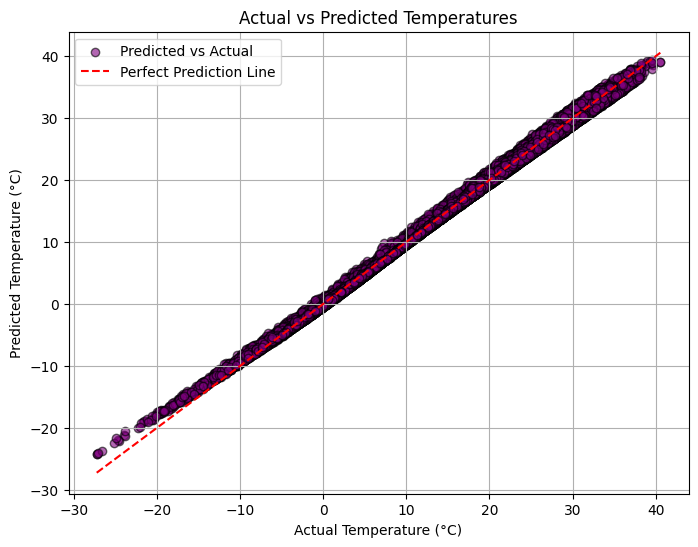

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, edgecolors='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

# MODEL DEPLOYMENT

In [ ]:
# Save model
joblib.dump(model, 'temperature_model.joblib')
print("Model saved as 'temperature_model.joblib'")

Model saved as 'temperature_model.joblib'


In [ ]:
#import required libraries

import joblib
import numpy as np

In [ ]:
!pip install gradio

In [ ]:

# Assume your trained model is called 'model'
joblib.dump(model, "temperature_model.joblib")

['temperature_model.joblib']

In [ ]:
import gradio as gr


In [ ]:

# Load trained model
model = joblib.load('temperature_model.joblib')


In [ ]:

# Define the prediction function
def predict_temperature(rh, dp, at, p, ws):
    input_data = np.array([[rh, dp, at, p, ws]])
    prediction = model.predict(input_data)[0]
    return f"🌡️ Predicted Temperature: {prediction:.2f} °C"

# Example inputs for quick testing
examples = [
    [60, 15, 18, 1013, 3],
    [80, 20, 22, 1008, 5],
    [50, 12, 14, 1015, 2]
]

# Create Gradio interface with custom theme and colors
with gr.Blocks(theme=gr.themes.Soft(primary_hue="purple", secondary_hue="pink")) as demo:
    gr.Markdown(
        """
        # 🌞 **Temperature Predictor Dashboard**
        Welcome! Input environmental data to predict the **temperature** with our trained model.
        """
    )

    with gr.Row():
        rh = gr.Number(label="Relative Humidity (%)", value=60)
        dp = gr.Number(label="Dew Point (°C)", value=15)

    with gr.Row():
        at = gr.Number(label="Apparent Temperature (°C)", value=18)
        p = gr.Number(label="Pressure MSL (hPa)", value=1013)
        ws = gr.Number(label="Wind Speed (m/s)", value=3)

    predict_btn = gr.Button("🔍 Predict Temperature", variant="primary")
    output = gr.Textbox(label="Result", interactive=False)

    # Action on button click
    predict_btn.click(fn=predict_temperature,
                      inputs=[rh, dp, at, p, ws],
                      outputs=output)

    gr.Examples(examples, inputs=[rh, dp, at, p, ws])

# Launch the app with shareable link
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e08befa61d2d0dcca1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
